# Chitkara, Shubham - Homework 2

We numerically explore the relationship between error distributions, objective functions (least squares versus least absolute deviation, and computational speed.

The following simulation creates a data set according to
$$y_i = \beta_1 + \beta_2 x_i + \beta_3 x_i^2 + \epsilon_i.$$

We generate $n$ observations from this model for $x$ on an equally spaced grid $[0,1]$. For $Yt$, the errors ($\epsilon_i$) have a t-distribution with 2 degrees of freedom. For $Yn$, the errors have a standard normal distribution. We plot each of these data sets and the true regression function.

In [98]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
import scipy
from scipy.stats import t
from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.formula.api as smf

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.style.use('seaborn-whitegrid')
rcParams['figure.figsize'] = 6,6

In [77]:
n= 500
x= np.linspace(0,1,500)
X= np.column_stack((np.ones(n),x, np.square(x)))
beta= np.array([1,2,4])
Yt= np.matmul(X,beta)+ np.random.standard_t(2,size=n)
Yn=  np.matmul(X,beta)+ np.random.normal(size=n)

(500,)

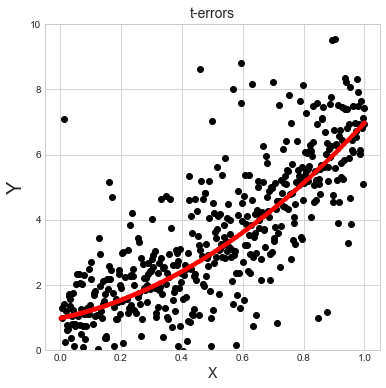

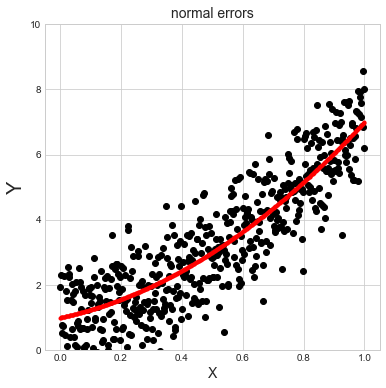

In [76]:

plt.plot(X[:,1], Yt, 'o', color='black')
plt.plot(X[:,1], np.matmul(X,beta),'r.')
plt.ylabel('Y',fontsize=20)
plt.xlabel('X',fontsize=14)
plt.title('t-errors', fontsize=14)
plt.ylim((0,10))
plt.show()


plt.plot(X[:,1], Yn,'o',color='black')
plt.plot(X[:,1], np.matmul(X,beta),'r.') # can use alpha=0.5 to decrease line color intesity
plt.ylabel('Y',fontsize=20)
plt.xlabel('X',fontsize=14)
plt.title('normal errors', fontsize=14)
plt.ylim((0,10))
plt.show()

The t distribution produces a lot of outliers (some outliers are not shown because we restricted the y-axis to ylim in each plot). Given the data, out goal is to infer the parameters $\beta$. We will consider two methods. The least squares method we discussed in class is
$$ \beta_{LS} = \text{argmin}_{\beta} (y_i - \beta_1 - \beta_2 x_i - \beta_3 x_i^2)^2 =  \text{argmin}_{\beta} (Y - X\beta)^T(Y - X\beta) = (X^TX)^{-1}X^TY$$
A second possibility is to find the [least absolute deviations](https://en.wikipedia.org/wiki/Least_absolute_deviations) estimator. We call this $\beta_{LAD}$ which has the form
$$\beta_{LAD} = \text{argmin}_{\beta} |y_i - \beta_1 - \beta_2 x_i - \beta_3 x_i^2|.$$
This may also be known as $L_1$ regression or quantile regression with the $0.5$ quantile.

In this homework you will fit both $\beta_{LS}$ and $\beta_{LAD}$ and compare the methods based on parameter estimation accuracy and speed.

## Question 1

Fixing $X$, generate the $Yt$ and $Yn$ data $N=100$ times (note that $n$ is the sample size and $N$ is the number of times we run the simulation). Compute $\beta_{LS}$ and $\beta_{LAD}$ each time. Since $\beta$ is a vector of length $3$, this will result in 4 matrices (LS for $Yt$ and $Yn$ and LAD for $Yt$ and $Yn$) with $N$ rows and 3 columns (you could store this output in other formats as well, but matrices are convenient).

Make scatterplots of $\beta_2$ versus $\beta_3$ estimates for each type of data, estimator. This will produce four scatterplots. Mark the true $\beta_2$ and $\beta_3$ on each plot and comment of the quality of the estimators in the different settings. You scatterplot should look similar to the ones below.

**Tips for Fitting** For fitting $\beta_{LS}$, you have many options in R (lm, lm.fit) and python (scipy.linalg.lstsq, sklearn.linear_model.LinearRegression). For fitting $\beta_{LAD}$ in R you can use l1fit from the package L1pack or  rq.fit from quantreg. For fitting $\beta_{LAD}$ in python the options are somewhat more limited:
* [statsmodels](http://www.statsmodels.org/dev/examples/notebooks/generated/quantile_regression.html) requires use of pandas, calls the quantreg R package
* generic optimizer such as [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)

The later is a more general method that will likely be slower. But scipy.optimize is general and will be useful for many other problems. You may also use any other optimizer you find. 

In [200]:
N=100
lm=LinearRegression()
LS_Yt=np.zeros((N,2))
LAD_Yt=np.zeros((N,3))
for i in range(N):
    Yt_i=np.matmul(X,beta)+ np.random.standard_t(2,size=n)
    lm.fit(X[:,1:3],Yt_i)
    LS_Yt[i]=lm.coef_
    data=pd.DataFrame(np.column_stack((Yt_i,X)))
    lad = smf.quantreg('data[0]~data[2]+data[3]',data)
    res= lad.fit(q=.5)
    LAD_Yt[i]=res.params

C:\Users\shubhs02\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
C:\Users\shubhs02\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
C:\Users\shubhs02\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
C:\Users\shubhs02\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
C:\Users\shubhs02\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regres

[[ 1.09841997  1.68754121  4.38554734]
 [ 0.71970462  3.19748332  2.90049957]
 [ 1.10051677  2.15707624  3.63698502]
 [ 1.13819841  1.36631971  4.47432927]
 [ 0.94722807  1.66482172  4.52912253]
 [ 0.90452332  2.80899477  3.08500136]
 [ 1.01183534  2.38442448  3.60518518]
 [ 1.01491245  2.15932566  3.82446912]
 [ 0.9159604   2.61483708  3.4190349 ]
 [ 1.04101799  2.48272053  3.30342159]
 [ 1.10536283  1.71497158  4.41966666]
 [ 0.87453881  2.59604558  3.20979335]
 [ 0.83008847  3.05245531  3.17550791]
 [ 1.10022791  1.18398507  4.91954968]
 [ 0.67170319  3.08460043  3.28681444]
 [ 1.08171852  1.70939915  4.27429328]
 [ 1.09142393  1.81108541  4.05750662]
 [ 1.18519703  1.44353894  4.30089338]
 [ 1.10662327  0.92768402  5.10504915]
 [ 1.11935808  1.79348254  4.232471  ]
 [ 0.90823155  2.43092342  3.66840408]
 [ 0.90900747  1.71043733  4.43085256]
 [ 1.27849752  1.13677458  4.71275403]
 [ 1.16719991  1.39039428  4.51199462]
 [ 0.95555903  1.80429305  4.18859578]
 [ 0.8292752   3.1552305 

In [191]:
LS_Yn=np.zeros((N,2))
LAD_Yn=np.zeros((N,3))
for i in range(N):
    Yn_i=np.matmul(X,beta)+ np.random.normal(size=n)
    lm.fit(X[:,1:3],Yn_i)
    LS_Yn[i]=lm.coef_
    data=pd.DataFrame(np.column_stack((Yn_i,X)))
    lad = smf.quantreg('data[0]~data[2]+data[3]',data)
    res= lad.fit(q=.5)
    LAD_Yn[i]=res.params

C:\Users\shubhs02\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
C:\Users\shubhs02\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


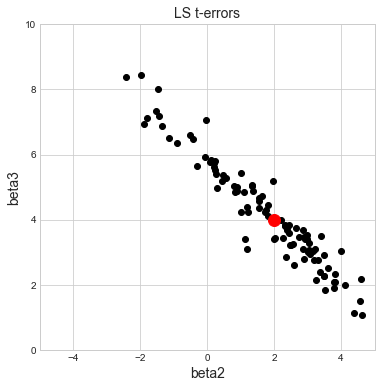

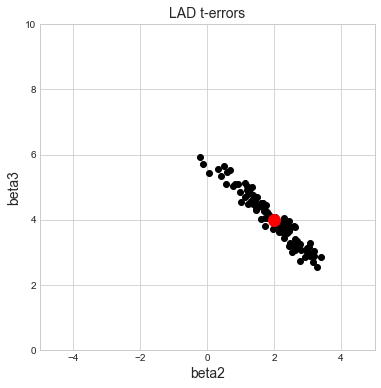

In [218]:
plt.plot(LS_Yt[:,0], LS_Yt[:,1], 'o', color='black')
plt.plot(2,4,'o',color='red',markersize=12)
plt.ylabel('beta3',fontsize=14)
plt.xlabel('beta2',fontsize=14)
plt.title('LS t-errors', fontsize=14)
plt.ylim((0,10))
plt.xlim((-5,5))
plt.show()

plt.plot(LAD_Yt[:,1], LAD_Yt[:,2], 'o', color='black')
plt.plot(2,4,'o',color='red',markersize=12)
plt.ylabel('beta3',fontsize=14)
plt.xlabel('beta2',fontsize=14)
plt.title('LAD t-errors', fontsize=14)
plt.ylim((0,10))
plt.xlim((-5,5))
plt.show()

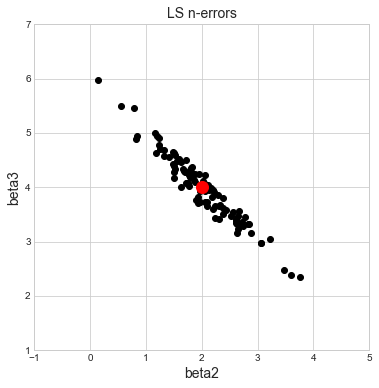

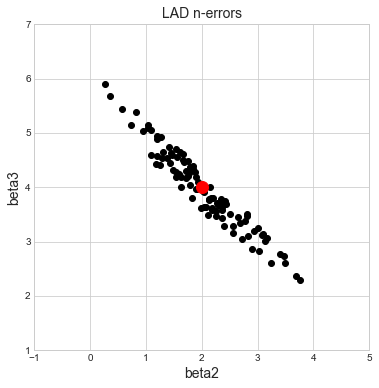

In [219]:
plt.plot(LS_Yn[:,0], LS_Yn[:,1], 'o', color='black')
plt.plot(2,4,'o',color='red',markersize=12)
plt.ylabel('beta3',fontsize=14)
plt.xlabel('beta2',fontsize=14)
plt.title('LS n-errors', fontsize=14)
plt.ylim((1,7))
plt.xlim((-1,5))
plt.show()

plt.plot(LAD_Yn[:,1], LAD_Yn[:,2], 'o', color='black')
plt.plot(2,4,'o',color='red',markersize=12)
plt.ylabel('beta3',fontsize=14)
plt.xlabel('beta2',fontsize=14)
plt.title('LAD n-errors', fontsize=14)
plt.ylim((1,7))
plt.xlim((-1,5))
plt.show()

## Question 2

Compare the speed of $\beta_{LS}$ to $\beta_{LAD}$ using a package such as benchmark in R or some of the tools [here](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html) in python. Empirically determine the computational complexity (in $n$) of $\beta_{LAD}$ and $\beta_{LS}$ (we know from theoretical analysis that $\widehat{\beta}_{LS}$ should be linear in $n$).

In [230]:
Yt_i=np.matmul(X,beta)+ np.random.standard_t(2,size=n)

%time lm=LinearRegression(); lm_fit=lm.fit(X[:,1:3],Yt_i)

Wall time: 1e+03 µs


In [234]:
data=pd.DataFrame(np.column_stack((Yt_i,X)))

t= %time lad = smf.quantreg('data[0]~data[2]+data[3]',data); res= lad.fit(q=.5)


Wall time: 20 ms


In [251]:
for i in range (10000,2500000,10000):
    x= np.linspace(0,1,i)
    X= np.column_stack((np.ones(i),x, np.square(x)))
    beta= np.array([1,2,4])
    Yt_i=np.matmul(X,beta)+ np.random.standard_t(2,size=i)
    %time lm=LinearRegression(); lm_fit=lm.fit(X[:,1:3],Yt_i)

Wall time: 2 ms
Wall time: 3 ms
Wall time: 2 ms
Wall time: 4 ms
Wall time: 3 ms
Wall time: 4 ms
Wall time: 5 ms
Wall time: 6 ms
Wall time: 9 ms
Wall time: 7 ms
Wall time: 7 ms
Wall time: 11 ms
Wall time: 10 ms
Wall time: 10 ms
Wall time: 15 ms
Wall time: 12 ms
Wall time: 14 ms
Wall time: 15 ms
Wall time: 14 ms
Wall time: 21 ms
Wall time: 22 ms
Wall time: 18 ms
Wall time: 18 ms
Wall time: 24 ms
Wall time: 26 ms
Wall time: 21 ms
Wall time: 21 ms
Wall time: 23 ms
Wall time: 24 ms
Wall time: 26 ms
Wall time: 24 ms
Wall time: 25 ms
Wall time: 35 ms
Wall time: 32 ms
Wall time: 46 ms
Wall time: 40 ms
Wall time: 42 ms
Wall time: 109 ms
Wall time: 43 ms
Wall time: 46 ms
Wall time: 47 ms
Wall time: 49 ms
Wall time: 50 ms
Wall time: 149 ms
Wall time: 114 ms
Wall time: 153 ms
Wall time: 107 ms
Wall time: 54 ms
Wall time: 58 ms
Wall time: 129 ms
Wall time: 58 ms
Wall time: 59 ms
Wall time: 60 ms
Wall time: 61 ms
Wall time: 62 ms
Wall time: 64 ms
Wall time: 64 ms
Wall time: 66 ms
Wall time: 67 ms
Wa

In [252]:
for i in range (10000,2500000,10000):
    x= np.linspace(0,1,i)
    X= np.column_stack((np.ones(i),x, np.square(x)))
    beta= np.array([1,2,4])
    Yt_i=np.matmul(X,beta)+ np.random.standard_t(2,size=i)
    data=pd.DataFrame(np.column_stack((Yt_i,X)))
    %time t= %time lad = smf.quantreg('data[0]~data[2]+data[3]',data); res= lad.fit(q=.5)

Wall time: 672 ms
Wall time: 673 ms
Wall time: 127 ms
Wall time: 128 ms
Wall time: 214 ms
Wall time: 216 ms
Wall time: 301 ms
Wall time: 307 ms
Wall time: 359 ms
Wall time: 362 ms
Wall time: 687 ms
Wall time: 688 ms
Wall time: 716 ms
Wall time: 717 ms
Wall time: 3.86 s
Wall time: 3.87 s
Wall time: 973 ms
Wall time: 974 ms
Wall time: 1.31 s
Wall time: 1.31 s
Wall time: 682 ms
Wall time: 684 ms
Wall time: 949 ms
Wall time: 950 ms
Wall time: 1.47 s
Wall time: 1.47 s
Wall time: 1.28 s
Wall time: 1.29 s
Wall time: 3.39 s
Wall time: 3.39 s
Wall time: 2.02 s
Wall time: 2.02 s
Wall time: 2.01 s
Wall time: 2.01 s
Wall time: 6.43 s
Wall time: 6.43 s
Wall time: 1.6 s
Wall time: 1.61 s
Wall time: 3.32 s
Wall time: 3.32 s
Wall time: 2.3 s
Wall time: 2.3 s
Wall time: 2.48 s
Wall time: 2.48 s
Wall time: 3.13 s
Wall time: 3.13 s
Wall time: 2.6 s
Wall time: 2.6 s
Wall time: 4.14 s
Wall time: 4.14 s
Wall time: 2.03 s
Wall time: 2.03 s
Wall time: 3.02 s
Wall time: 3.02 s
Wall time: 3.71 s
Wall time: 3.71

Wall time: 23.1 s
Wall time: 23.1 s
Wall time: 19.9 s
Wall time: 19.9 s
Wall time: 22.8 s
Wall time: 22.8 s
Wall time: 18 s
Wall time: 18 s
Wall time: 18.7 s
Wall time: 18.7 s
Wall time: 21 s
Wall time: 21 s
Wall time: 20.8 s
Wall time: 20.8 s
Wall time: 23 s
Wall time: 23 s
Wall time: 29.7 s
Wall time: 29.7 s
Wall time: 17.7 s
Wall time: 17.7 s
Wall time: 19 s
Wall time: 19 s
Wall time: 15.3 s
Wall time: 15.3 s
Wall time: 23.6 s
Wall time: 23.6 s
Wall time: 20.9 s
Wall time: 20.9 s
Wall time: 22.2 s
Wall time: 22.2 s
Wall time: 20.2 s
Wall time: 20.2 s
Wall time: 20.9 s
Wall time: 20.9 s
Wall time: 15.7 s
Wall time: 15.7 s
Wall time: 12.8 s
Wall time: 12.8 s
